The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## Data Loading

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

Tidak ada Missing Value

In [12]:
df.duplicated().any()

False

Tidak ada Duplikasi Data

## Data Visualiasization

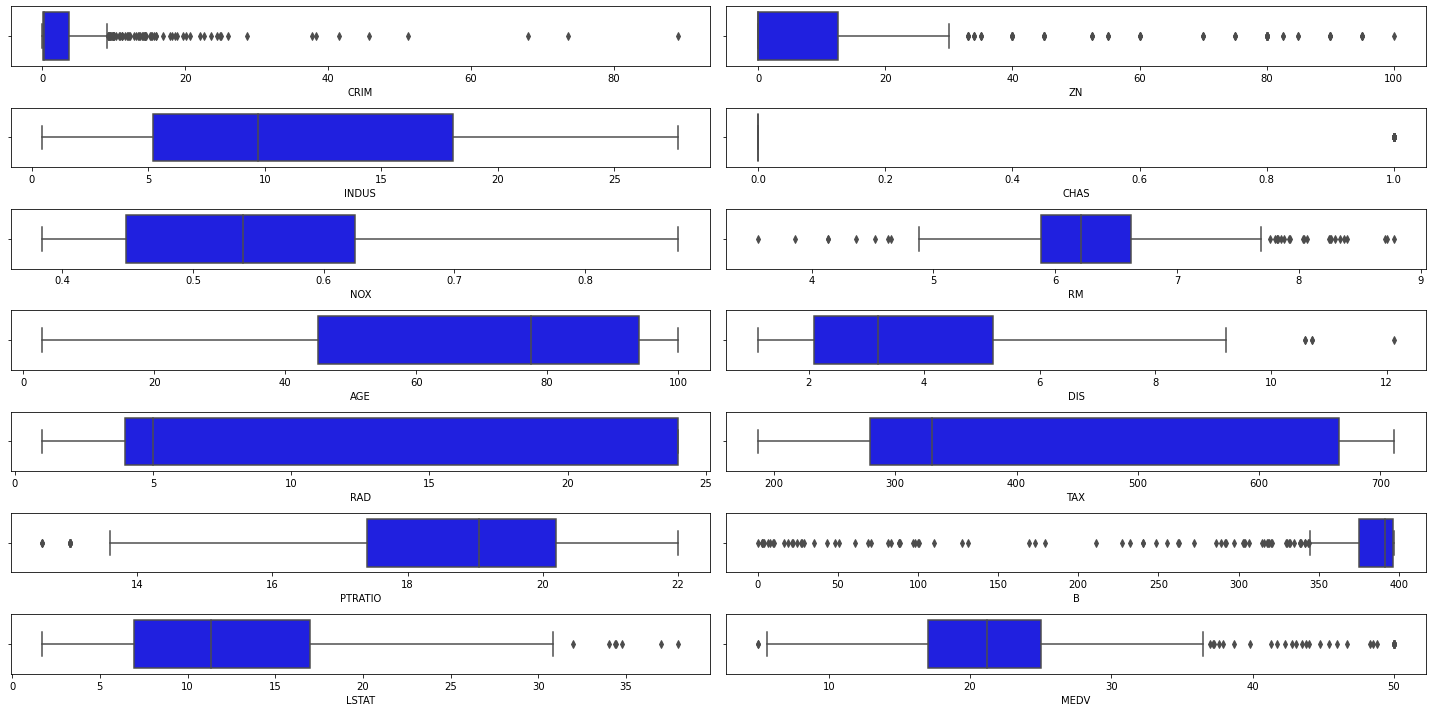

In [16]:
plt.figure(figsize=(20, 10))
for i in range(0, len(column_names)):
  plt.subplot(7, 2, i+1)
  sns.boxplot(df[column_names[i]], color='Blue')
  plt.tight_layout()

Dapat dilihat dari gambar diatas, terdapat outliers pada data ***CRIM, ZN, CHAS RM, PTRATIO, B, LSTAT, dan MEDV.***

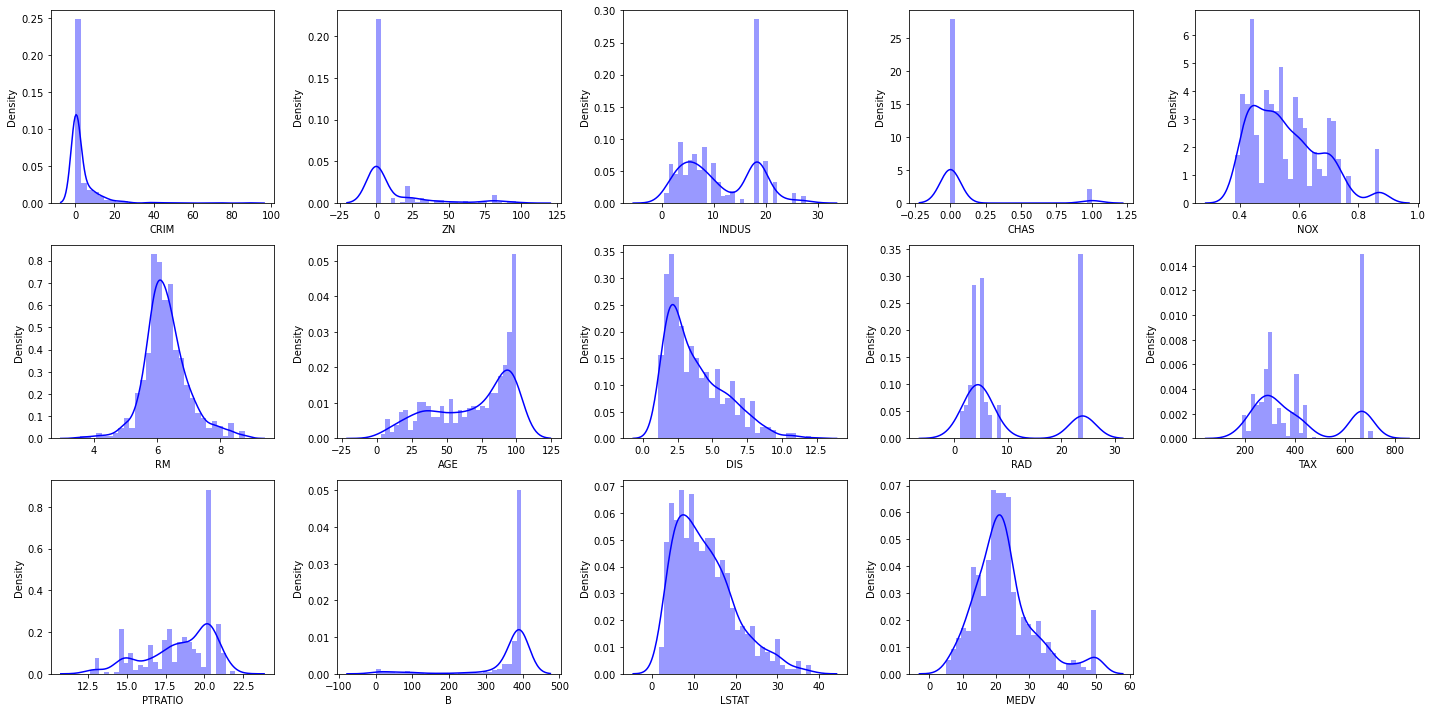

In [21]:
plt.figure(figsize=(20, 10))
for i in range(0, len(column_names)):
  plt.subplot(3, 5, i+1)
  sns.distplot(df[column_names[i]], color='blue', bins=30)
  plt.tight_layout()

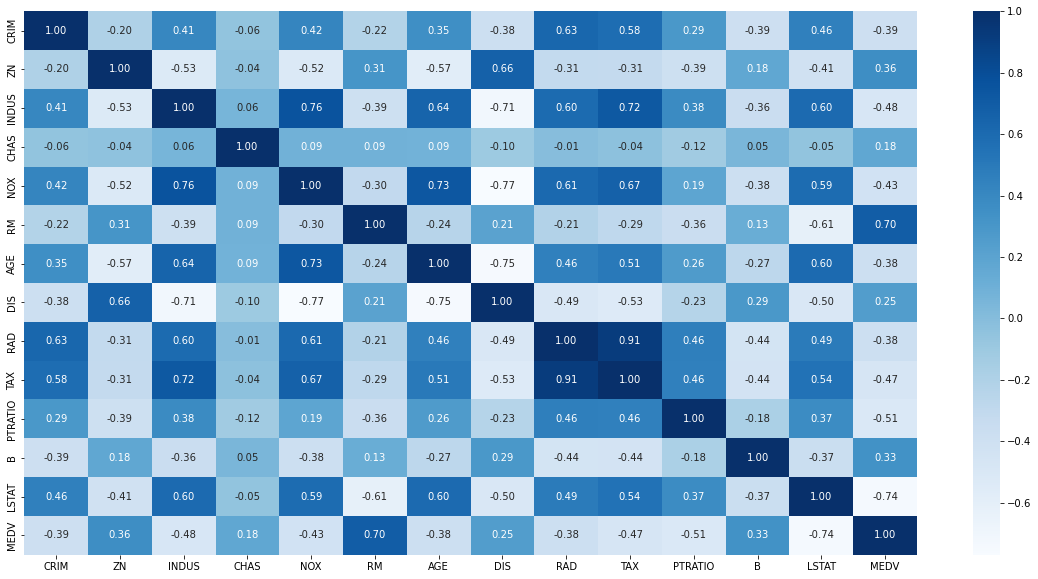

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

## Data Preprocessing

In [27]:
mx = MinMaxScaler()

df['ZN'] = mx.fit_transform(df[['ZN']])
df['INDUS'] = mx.fit_transform(df[['INDUS']])
df['RM'] = mx.fit_transform(df[['RM']])
df['AGE'] = mx.fit_transform(df[['AGE']])
df['DIS'] = mx.fit_transform(df[['DIS']])
df['RAD'] = mx.fit_transform(df[['RAD']])
df['TAX'] = mx.fit_transform(df[['TAX']])
df['PTRATIO'] = mx.fit_transform(df[['PTRATIO']])
df['B'] = mx.fit_transform(df[['B']])
df['LSTAT'] = mx.fit_transform(df[['LSTAT']])
df['MEDV'] = mx.fit_transform(df[['MEDV']])

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.18,0.067815,0,0.538,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.02731,0.00,0.242302,0,0.469,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.02729,0.00,0.242302,0,0.469,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.03237,0.00,0.063050,0,0.458,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.06905,0.00,0.063050,0,0.458,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,0.420455,0,0.573,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.04527,0.00,0.420455,0,0.573,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.06076,0.00,0.420455,0,0.573,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.10959,0.00,0.420455,0,0.573,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


## Modeling

In [33]:
# Split Data
X=df.drop(columns=['MEDV'])
y=df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

## LinearRegression

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr_model.predict(X_test)
y_pred

array([ 0.61455626,  0.51318878,  0.28953374,  0.36614924,  0.30723197,
        0.33066617,  0.60933664,  0.29035506,  0.4316173 ,  0.48910618,
        0.48979578,  0.52782151,  0.35903949,  0.48560004,  0.40863021,
        0.34805361,  0.27401827,  0.73884747,  0.56678908,  0.08320816,
        0.35115642,  0.25029514,  0.44929015,  0.44115017,  0.58631922,
        0.12695801,  0.19565214,  0.25909564,  0.70058351,  0.21483345,
        0.35824776,  0.19901303,  0.84804672,  0.28834214,  0.37335911,
        0.34628774,  0.2799864 ,  0.49380515,  0.09914208,  0.32954751,
        0.42905597,  0.35967307,  0.54605237,  0.25207056,  0.31810737,
        0.2125207 ,  0.76019677,  0.29130834,  0.46471628,  0.34067084,
        0.44806267,  0.43176027,  0.44602739,  0.48134062, -0.00974416,
        0.42404163,  0.13081837,  0.48642815,  0.26346631,  0.68637875,
        0.32349641,  0.50042865,  0.25743025,  0.30612245,  0.13641619,
        0.60808725,  0.70507417,  0.37687213,  0.43509992,  0.44

In [36]:
r2_score(y_test, y_pred)

0.7634174432138526

In [40]:
print('RMSE: %.2f'
      % mean_squared_error(y_test, y_pred, squared = False))

RMSE: 0.11


In [38]:
feature_importance = pd.DataFrame(lr_model.coef_, columns =['Importances']).join(pd.DataFrame(X_train.columns, columns = ['Features']))
feature_importance.sort_values(by='Importances', ascending =False)

,Importances,Features
5,0.359005,RM
8,0.156072,RAD
1,0.129019,ZN
11,0.064522,B
3,0.047333,CHAS
2,0.011130,INDUS
6,0.009608,AGE
0,-0.002497,CRIM
9,-0.129522,TAX
10,-0.206593,PTRATIO
